# Gradient Descent Algorithm Implementation
Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

### Reference https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

In [3]:
import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [4]:
data = pd.read_csv('data.csv', header=None, names=['col1', 'col2'])
data.head()

,col1,col2
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
#data matrix
datam = data.values
datam[:10]

array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513],
       [55.14218841, 78.21151827],
       [52.21179669, 79.64197305],
       [39.29956669, 59.17148932],
       [48.10504169, 75.3312423 ],
       [52.55001444, 71.30087989]])

In [6]:
type(datam)

numpy.ndarray

In [7]:
arrlen = datam.shape[0]
arrlen

100

In [8]:
x = datam[:,0]
y = datam[:,1]

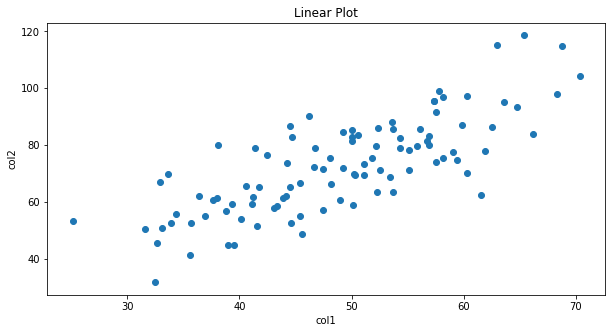

In [9]:
plt.figure(figsize=(10,5))
plt.title('Linear Plot')
plt.scatter(x,y)
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()

#### There is linear relationship between the two variables. Lets find the best fitting line.

### The goal of linear regression is to fit a line to a set of points. To find the best line for our data, we need to find the best set of slope m and y-intercept b values.

A standard approach to solving this type of problem is to define an error function (also called a cost function) that measures how “good” a given line is. This function will take in a (m,b) pair and return an error value based on how well the line fits our data. To compute this error for a given line, we’ll iterate through each (x,y) point in our data set and sum the square distances between each point’s y value and the candidate line’s y value (computed at mx + b). It’s conventional to square this distance to ensure that it is positive and to make our error function differentiable. 

# Sum of squared error
<img src="sse.gif" width=200px align='left'>

In [76]:
def SSE(m, b, data):
    sse = 0.0
    for i in range(arrlen):
        x = data[i, 0]
        y = data[i, 1]
        #rating with current fitting line y=mx+b
        y1 = m*x + b
        
        #squared error
        se = (y - y1) **2
        sse += se
    return sse

In [12]:
m = 1
b = 20
sse = SSE(m, b, datam)
sse

13429.768628713307

In [13]:
m = 2
b = 40
sse = SSE(m, b, datam)
sse

440207.7233175919

# Visualize data plus fitting line

<IPython.core.display.Javascript object>


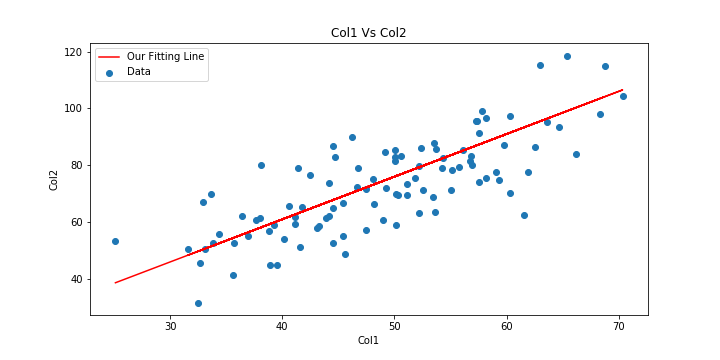

In [69]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Col1 Vs Col2')
ax.scatter(x,y,label='Data')
plt.plot(x, m*x + b,color='red',label='Our Fitting Line')
ax.set_xlabel('Col1')
ax.set_ylabel('Col2')
ax.legend(loc='best')

plt.show()

# Minimizing error via Gradient Descent

Lines that fit our data better (where better is defined by our error function) will result in lower error values. If we minimize this function, we will get the best line for our data. Since our error function consists of two parameters (m and b) we can visualize it as a two-dimensional surface. 

<img src="gd.png" width=500px align='left'>

Each point in this two-dimensional space represents a line. The height of the function at each point is the error value for that line. You can see that some lines yield smaller error values than others (i.e., fit our data better). When we run gradient descent search, we will start from some location on this surface and move downhill to find the line with the lowest error.

To run gradient descent on this error function, we first need to compute its gradient. The gradient will act like a compass and always point us downhill. To compute it, we will need to differentiate our error function. Since our function is defined by two parameters (m and b), we will need to compute a partial derivative for each. These derivatives work out to be:

<img src="gd-derivatives.png" width=200px align='left'>

The learningRate variable controls how large of a step we take downhill during each iteration. If we take too large of a step, we may step over the minimum. However, if we take small steps, it will require many iterations to arrive at the minimum.

In [15]:
def step_gradient(m_current, b_current, data, learningRate):
    m_gradient = 0
    b_gradient = 0
    N = float(arrlen)
    for i in range(arrlen):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        new_m = m_current - (learningRate * m_gradient)
        new_b = b_current - (learningRate * b_gradient)
    return [new_m, new_b]

In [16]:
m = 1
b = 20
sse = SSE(m,b,datam)
sse
learning_rate = 0.0001
print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

for i in range(2):
    m,b = step_gradient(m, b, datam, learning_rate)
    sse = SSE(m, b, datam)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1, m, b, sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m, b, sse))

Starting line: y = 1.00x + 20.00 - Error: 13429.77
At step 1 - Line: y = 1.04x + 20.00 - Error: 12038.21
At step 2 - Line: y = 1.06x + 20.00 - Error: 11688.06

Best  line: y = 1.06x + 20.00 - Error: 11688.06


In [17]:
def gradient_descent_runner(starting_m, starting_b, data, learning_rate, num_iterations):
    m = starting_m
    b = starting_b
    disp_freq = num_iterations/10
    for i in range(num_iterations):
        m, b = step_gradient(m, b, data, learning_rate)
        if(i% disp_freq ==0):
            sse = SSE(m, b, data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1, m, b, sse))
    print('\n Best line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
        
    return [m, b]

In [18]:
M_STARTING  = 0
B_STARTING = 0
NUM_STEPS = 1000

In [19]:
m_best,b_best = gradient_descent_runner(M_STARTING,B_STARTING,datam, learning_rate, NUM_STEPS)

At step 1 - Line: y = 0.737070x + 0.014547 - Error: 148458.655741
At step 101 - Line: y = 1.478802x + 0.035135 - Error: 11264.702057
At step 201 - Line: y = 1.478684x + 0.041138 - Error: 11264.341600
At step 301 - Line: y = 1.478566x + 0.047136 - Error: 11263.981688
At step 401 - Line: y = 1.478448x + 0.053129 - Error: 11263.622318
At step 501 - Line: y = 1.478330x + 0.059118 - Error: 11263.263490
At step 601 - Line: y = 1.478213x + 0.065103 - Error: 11262.905203
At step 701 - Line: y = 1.478095x + 0.071083 - Error: 11262.547457
At step 801 - Line: y = 1.477978x + 0.077059 - Error: 11262.190250
At step 901 - Line: y = 1.477860x + 0.083030 - Error: 11261.833583

 Best line: y = 1.477744x + 0.088937 - Error: 11261.833583


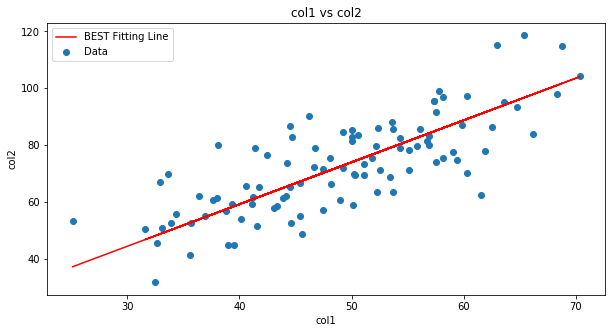

In [20]:
m = m_best
b = b_best
x = datam[:,0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('col1 vs col2')
ax.scatter(x=x,y=datam[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.legend(loc='best')


# 3D Visualizing Gradient Descent

In [21]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def error(x, y):
    return SSE(x, y, datam)

In [23]:
m = np.arange(1, 2, 0.01)
b = np.arange(-0.5, 0.5, 0.01)

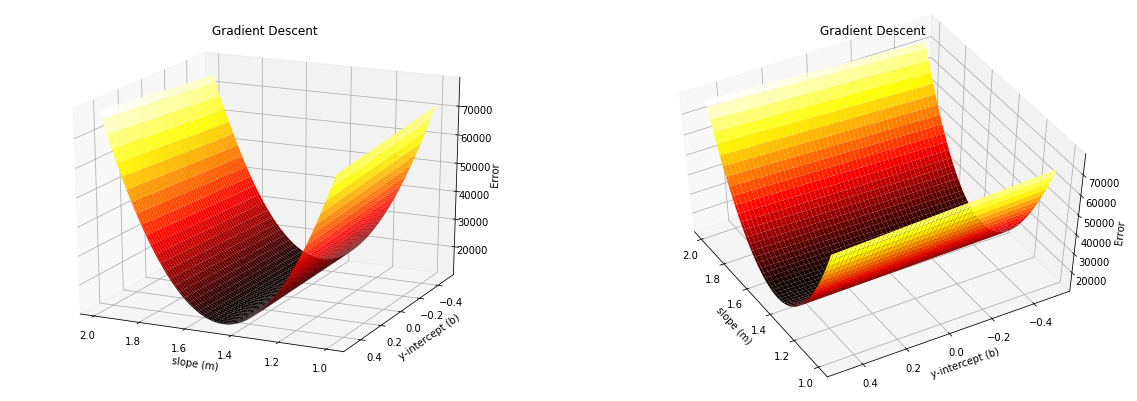

In [24]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121, projection = '3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')

plt.show()

##### Each point in this two-dimensional space represents a line. The height of the function at each point is the error value for that line.

# Live Plot - Gradient Search & Intermediate lines
The current location of the gradient descent search and the path taken to get there and the corresponding line for the current search location.

In [70]:
%matplotlib notebook

def make_plots(fig,axes,m_list,b_list,m,b,data,step):
    
    #PLOT1
    ax = axes[1]
    ax.set_title('Col1 vs Col2')
    ax.set_xlim(30,70)
    ax.set_ylim(40,120)
    ax.set_xlabel('Col1')
    ax.set_ylabel('Col2')
    
    ax.scatter(x=data[:,0],y=data[:,1],label='Data')
    ax.plot(data[:,0], m*data[:,0] + b,color='red',label='First Fitting Line (Step %d)' % step)
    
    ax.legend(loc='best')
    
    #PLOT2
    ax2 = axes[0]
    ax2.cla()
    
    ax2.set_title('Gradient Search')
    ax2.set_xlim(1.45,1.5)
    ax2.set_ylim(0.998,1.000)
    ax2.set_xlabel('slope (m)')
    ax2.set_ylabel('y intercept (b)')
    
    ax2.text(-1.15, 0.97, 'Iteration: '+str(step),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    ax2.text(-1.15, 0.93, 'm = '+str(round(m,3))+', b = '+str(round(b,3)),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    
    ax2.plot(m_list,b_list,color='black',linewidth=0.5)
    ax2.scatter(m,b,marker='^')    
    
    fig.canvas.draw()

In [71]:
def gradient_descent_n_steps_with_plot(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    
    fig,axes = plt.subplots(1,2,figsize=(10,7))
    
    m_list = [m_starting]
    b_list = [b_starting]
    m = m_starting
    b = b_starting
    plt.cla()
    for i in range(steps):
        step = i
        make_plots(fig,axes,m_list,b_list,m,b,data,step)
        
        m,b = step_gradient(m, b, datam, learning_rate)
        m_list.append(m)
        b_list.append(b)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    make_plots(fig,axes,m_list,b_list,m,b,data,step)

<IPython.core.display.Javascript object>


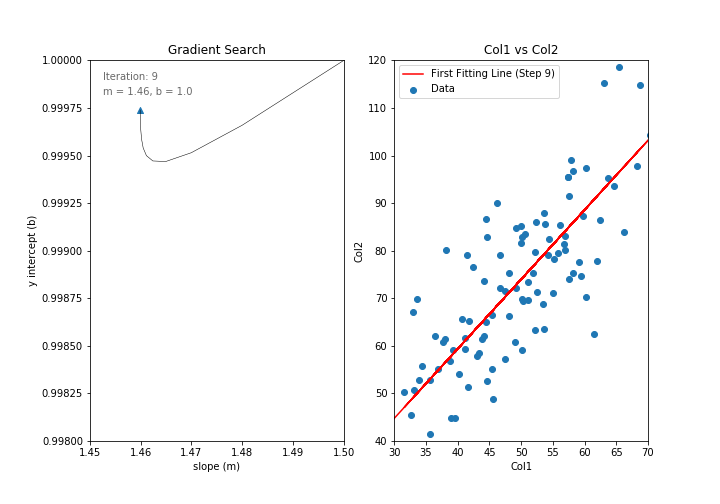

In [77]:
m = 1.5
b = 1
steps = 10
gradient_descent_n_steps_with_plot(m, b, datam, steps)

# Error Visualization

In [73]:
def error_plot(fig,ax,error_list,error,data,step):
    #PLOT2

    ax.cla()
    
    ax.set_title('Error (step %d)' % step)
    ax.set_xlabel('Iteration number')
    ax.set_ylabel('Error')
    
    ax.plot(np.arange(0,len(error_list)),error_list)    
    fig.canvas.draw()

In [74]:
def gradient_descent_n_steps_with_error_plot(m_starting, b_starting, data, steps): #For doing it many times in an easy way ;)
    
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    
    m = m_starting
    b = b_starting
    error_list = list()
    
    
    error = SSE(m,b,data)
    error_list.append(error)
    
    plt.cla()
    for i in range(steps):
        step = i
        error_plot(fig,ax,error_list,error,data,step)
        
        m,b = step_gradient(m, b, data, learning_rate)
        error = SSE(m,b,data)
        error_list.append(error)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    error_plot(fig,ax,error_list,error,data,step)

<IPython.core.display.Javascript object>


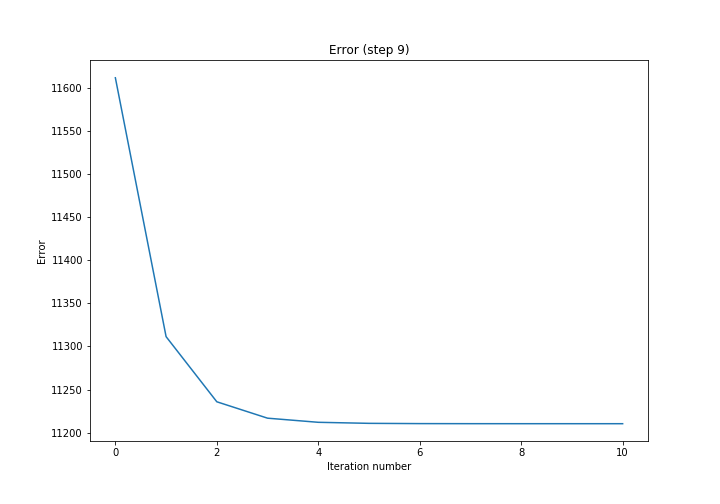

In [78]:
m = 1.5
b = 1
steps = 10
gradient_descent_n_steps_with_error_plot(m, b, datam, steps)